### Import Necessary Modules 

In [1]:

from tensorflow.keras.datasets import fashion_mnist, cifar10
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D, Dropout, BatchNormalization, GlobalAveragePooling2D, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNet

### Display Loaded Data 

In [2]:
def display_img (img_set, title_set):
    n = len(img_set)
    plt.figure(figsize=(6,6))
    for i in range (n):
        plt.subplot(5,5,i+1)
        if(len(img_set[i].shape) == 2):
            plt.imshow(img_set[i], cmap='gray')
        else:
            plt.imshow(img_set[i])
        plt.title(title_set[i])
        plt.axis('off')

    plt.tight_layout()
    plt.show()
    plt.close()        

### Load the Data

trainx Shape : (60000, 28, 28), trainX Shape : (60000,)
trainX Format : uint8, trainY Format : uint8
Testx Shape : (10000, 28, 28), Testy Shape : (10000,)
testX Format : uint8, testY Format : uint8


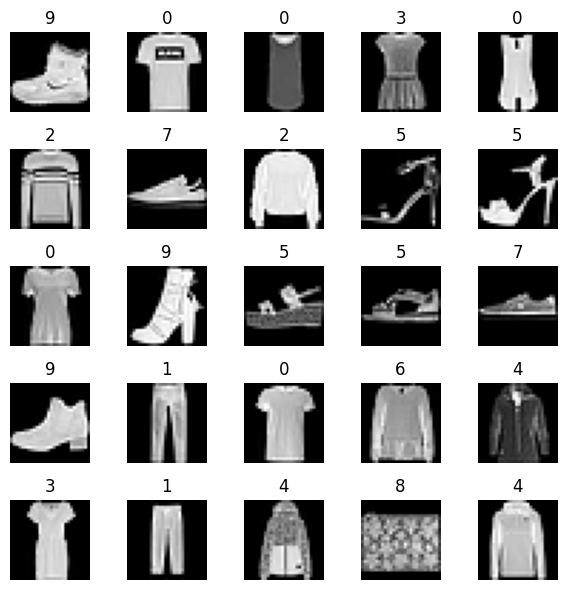

In [3]:
# Load Data 
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()

# Investigate Loaded Data 
print(f'trainx Shape : {trainX.shape}, trainX Shape : {trainY.shape}')
print(f"trainX Format : {trainX.dtype}, trainY Format : {trainY.dtype}")
print(f'Testx Shape : {testX.shape}, Testy Shape : {testY.shape}')
print(f"testX Format : {testX.dtype}, testY Format : {testY.dtype}")

# Display the loaded image 
display_img(trainX[:25], trainY[:25])

### Prepare Datasets 

In [4]:
# Turn 2D images into 3D so that trainX and trainY will be 4D since Convolutional layer takes 4D data as input

trainX = np.expand_dims(trainX, axis=-1)
testX = np.expand_dims(testX, axis=-1)

# Investigate the shape of the data after expanding the dimensions
print(f'trainx Shape : {trainX.shape}, testX Shape : {testX.shape}')
print(f"trainX Format : {trainX.dtype}, trainY Format : {trainY.dtype}")
print(f"trainX range : {trainX.max()} - {trainX.min()}")

# Turn y into one-hot-encoding, so that we can use 10 neurons in the output layer
trainY = to_categorical(trainY, num_classes = 10)
testY = to_categorical(testY, num_classes = 10)

# Investigate the shape of the data after one-hot-encoding
print(f'trainY Shape : {trainY.shape}, testY Shape : {testY.shape}')
print(f"trainY Format : {trainY.dtype}, testY Format : {testY.dtype}")

print(trainY[:5])


trainx Shape : (60000, 28, 28, 1), testX Shape : (10000, 28, 28, 1)
trainX Format : uint8, trainY Format : uint8
trainX range : 255 - 0
trainY Shape : (60000, 10), testY Shape : (10000, 10)
trainY Format : float64, testY Format : float64
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Build a Fully Connected Neural Network (FCNN) for classifying 10 classes of images

In [5]:
inputs = Input(shape=(28, 28, 1))
x = Flatten()(inputs)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
outputs = Dense(10, activation='softmax', )(x)
model = Model(inputs=inputs, outputs =outputs)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,335,818 (5.10 MB)

 Trainable params: 1,334,794 (5.09 MB)

 Non-trainable params: 1,024 (4.00 KB)

### Train a Fully Connected Neural Network (FCNN) for classifying 10 classes of images

In [6]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
fcnn_history = model.fit(trainX, trainY, batch_size = 28, validation_split = 0.1, epochs = 10)

Epoch 1/10
1929/1929 ━━━━━━━━━━━━━━━━━━━━ 51s 25ms/step - accuracy: 0.7389 - loss: 0.7415 - val_accuracy: 0.8388 - val_loss: 0.4361
Epoch 2/10
1929/1929 ━━━━━━━━━━━━━━━━━━━━ 46s 24ms/step - accuracy: 0.8292 - loss: 0.4766 - val_accuracy: 0.8503 - val_loss: 0.4108
Epoch 3/10
1929/1929 ━━━━━━━━━━━━━━━━━━━━ 46s 24ms/step - accuracy: 0.8408 - loss: 0.4391 - val_accuracy: 0.8537 - val_loss: 0.4105
Epoch 4/10
1929/1929 ━━━━━━━━━━━━━━━━━━━━ 57s 29ms/step - accuracy: 0.8431 - loss: 0.4394 - val_accuracy: 0.8575 - val_loss: 0.3797
Epoch 5/10
1929/1929 ━━━━━━━━━━━━━━━━━━━━ 58s 30ms/step - accuracy: 0.8553 - loss: 0.3954 - val_accuracy: 0.8707 - val_loss: 0.3572
Epoch 6/10
1929/1929 ━━━━━━━━━━━━━━━━━━━━ 62s 32ms/step - accuracy: 0.8603 - loss: 0.3841 - val_accuracy: 0.8703 - val_loss: 0.3522
Epoch 7/10
1929/1929 ━━━━━━━━━━━━━━━━━━━━ 50s 26ms/step - accuracy: 0.8633 - loss: 0.3732 - val_accuracy: 0.8700 - val_loss: 0.3464
Epoch 8/10
1929/1929 ━━━━━━━━━━━━━━━━━━━━ 51s 26ms/step - accuracy: 0.8696 -

### Test a Fully Connected Neural Network (FCNN) for classifying 10 classes of images

In [10]:
# Evaluate the model performance 
model.evaluate(testX, testY)

#predict the test data
predictY = model.predict(testX)

print("OriginaalY        PredictedY")
print("==========        =============")

for i in range(10):
    print(np.argmax(testY[i]), '\t\t', np.argmax(predictY[i]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8736 - loss: 0.3529
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
OriginaalY        PredictedY
==========        =============
9 		 9
2 		 2
1 		 1
1 		 1
6 		 6
1 		 1
4 		 4
6 		 6
5 		 5
7 		 7


### Build a Convolutional Neural Network (CNN) for classifying 10 classes of images

In [11]:
inputs = Input((28, 28, 1), name='InputLayer')
x = Conv2D(32, (3, 3), padding='same', activation='relu', name='Conv1')(inputs)
x = Conv2D(32, (3, 3), padding='same', activation='relu', name='Conv2')(x)
x = MaxPooling2D((2, 2), name='MaxPool1')(x)
x = Dropout(0.3, name='Dropout1')(x)
x = Conv2D(64, (3, 3), padding='same', activation='relu', name='Conv3')(x)
x = Conv2D(64, (3, 3), padding='same', activation='relu', name='Conv4')(x)
x = MaxPooling2D((2, 2), name='MaxPool2')(x)
x = Dropout(0.3, name='Dropout2')(x)
x = Flatten(name='Flatten')(x)

# Final Dense Layers
x = Dense(512, activation='relu', name='Dense1')(x)
outputs = Dense(10, activation='softmax', name='OutputLayer')(x)
model = Model(inputs=inputs, outputs=outputs, name='CNN_Model')
model.summary()




Model: "CNN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ InputLayer (InputLayer)         │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv1 (Conv2D)                  │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2 (Conv2D)                  │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPool1 (MaxPooling2D)         │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout1 (Dropout)              │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv3 (Conv2D)                  │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv4 (Conv2D)                  │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPool2 (MaxPooling2D)         │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout2 (Dropout)              │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 512)            │     1,606,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OutputLayer (Dense)             │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,676,266 (6.39 MB)

 Trainable params: 1,676,266 (6.39 MB)

 Non-trainable params: 0 (0.00 B)

### Train a Convolutional Neural Network (CNN) for classifying 10 classes of images

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_history = model.fit(trainX, trainY, batch_size=32, validation_split=0.1, epochs=10)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 126s 73ms/step - accuracy: 0.8686 - loss: 0.3563 - val_accuracy: 0.9010 - val_loss: 0.2712
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 123s 73ms/step - accuracy: 0.8896 - loss: 0.2972 - val_accuracy: 0.8968 - val_loss: 0.2733
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 118s 70ms/step - accuracy: 0.8978 - loss: 0.2732 - val_accuracy: 0.9015 - val_loss: 0.2589
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 118s 70ms/step - accuracy: 0.9073 - loss: 0.2500 - val_accuracy: 0.9147 - val_loss: 0.2370
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 119s 70ms/step - accuracy: 0.9089 - loss: 0.2431 - val_accuracy: 0.9200 - val_loss: 0.2222
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 120s 71ms/step - accuracy: 0.9160 - loss: 0.2236 - val_accuracy: 0.9193 - val_loss: 0.2100
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 118s 70ms/step - accuracy: 0.9191 - loss: 0.2151 - val_accuracy: 0.9223 - val_loss: 0.2114
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 121s 72ms/step - accuracy: 

### Test a Convolutional Neural Network (CNN) for classifying 10 classes of images

In [14]:
# Evaluate the model performance
model.evaluate(testX, testY)

# Predict Y values 
predictY = model.predict(testX)


print('OriginalX          PredictedY')
print("=========           ========")
for i in range(10):
    print(np.argmax(testY[i]), '\t\t', np.argmax(predictY[i]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9149 - loss: 0.2390
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
OriginalX          PredictedY
=========           ========
9 		 9
2 		 2
1 		 1
1 		 1
6 		 6
1 		 1
4 		 4
6 		 6
5 		 5
7 		 7


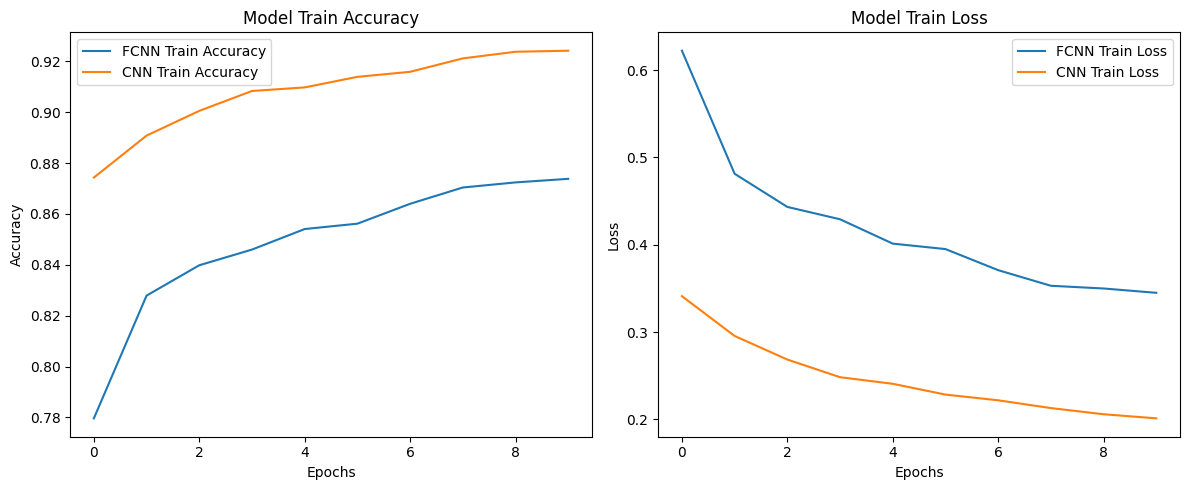

In [15]:
## Accuracy and Loss data for FCNN
fcnn_train_acc = fcnn_history.history['accuracy']
fcnn_val_acc = fcnn_history.history['val_accuracy']
fcnn_train_loss = fcnn_history.history['loss']
fcnn_val_loss = fcnn_history.history['val_loss']

# CNN Accuracy and Loss 
cnn_train_acc = cnn_history.history['accuracy']
cnn_val_acc = cnn_history.history['val_accuracy']
cnn_train_loss = cnn_history.history['loss']
cnn_val_loss = cnn_history.history['val_loss']

# Plot the accuracy and loss for FCNN and CNN
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(fcnn_train_acc, label='FCNN Train Accuracy')
plt.plot(cnn_train_acc, label='CNN Train Accuracy')
plt.title('Model Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(fcnn_train_loss, label='FCNN Train Loss')
plt.plot(cnn_train_loss, label='CNN Train Loss')
plt.title('Model Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


### 3. Build a CNN having a pre-trained MobileNet as backbone to classify 10 classes.


In [17]:
#Load Mobilenet with pre-trained weights
mobilenet_model = MobileNet(input_shape=(32, 32, 3), include_top=False, weights='imagenet', pooling='avg')

#freeze the layers of the model
for layer in mobilenet_model.layers:
    layer.trainable = False

# Build a new model on top of the mobilenet model
inputs = mobilenet_model.inputs 
x = mobilenet_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(10, activation='softmax')(x)
model = Model(inputs=inputs, outputs=x)
model.summary(show_trainable=True) 

C:\Users\Md Mominur Rahman\AppData\Local\Temp\ipykernel_7328\1730341799.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet_model = MobileNet(input_shape=(32, 32, 3), include_top=False, weights='imagenet', pooling='avg')


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer_2 (InputLayer)  │ (None, 32, 32, 3)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv1 (Conv2D)              │ (None, 16, 16, 32)    │        864 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv1_bn                    │ (None, 16, 16, 32)    │        128 │   N   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv1_relu (ReLU)           │ (None, 16, 16, 32)    │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_1 (DepthwiseConv2D) │ (None, 16, 16, 32)    │        288 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_1_bn                │ (None, 16, 16, 32)    │        128 │   N   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_1_relu (ReLU)       │ (None, 16, 16, 32)    │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_1 (Conv2D)          │ (None, 16, 16, 64)    │      2,048 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_1_bn                │ (None, 16, 16, 64)    │        256 │   N   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_1_relu (ReLU)       │ (None, 16, 16, 64)    │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pad_2 (ZeroPadding2D)  │ (None, 17, 17, 64)    │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_2 (DepthwiseConv2D) │ (None, 8, 8, 64)      │        576 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_2_bn                │ (None, 8, 8, 64)      │        256 │   N   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_2_relu (ReLU)       │ (None, 8, 8, 64)      │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_2 (Conv2D)          │ (None, 8, 8, 128)     │      8,192 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_2_bn                │ (None, 8, 8, 128)     │        512 │   N   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_2_relu (ReLU)       │ (None, 8, 8, 128)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_3 (DepthwiseConv2D) │ (None, 8, 8, 128)     │      1,152 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_3_bn                │ (None, 8, 8, 128)     │        512 │   N   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_3_relu (ReLU)       │ (None, 8, 8, 128)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_3 (Conv2D)          │ (None, 8, 8, 128)     │     16,384 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_3_bn                │ (None, 8, 8, 128)     │        512 │   N 

 Total params: 3,758,794 (14.34 MB)

 Trainable params: 529,930 (2.02 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

### Load Cifar10 datasets

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 157s 1us/step
trainx Shape : (50000, 32, 32, 3), trainX Shape : (50000, 1)
trainX Format : uint8, trainY Format : uint8
Testx Shape : (10000, 32, 32, 3), Testy Shape : (10000, 1)
testX Format : uint8, testY Format : uint8
trainX range : 255 - 0
testX range : 255 - 0


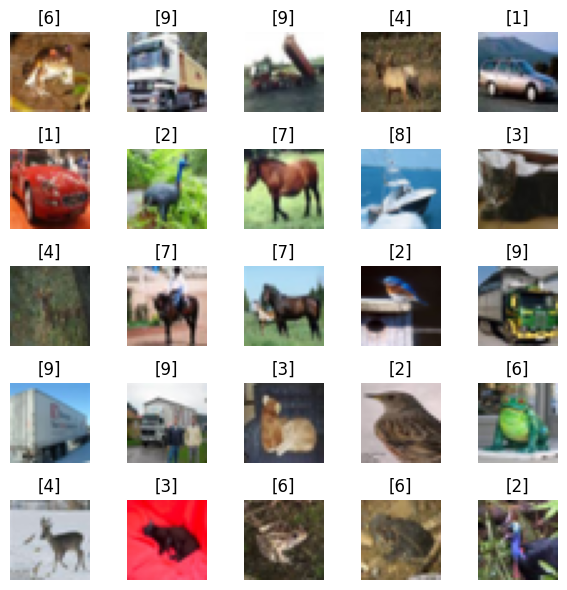

In [18]:
# Load CIFAR10 dataset
(trainX, trainY), (testX, testY) = cifar10.load_data()

# Investigate Loaded Data
print(f'trainx Shape : {trainX.shape}, trainX Shape : {trainY.shape}')
print(f"trainX Format : {trainX.dtype}, trainY Format : {trainY.dtype}")
print(f'Testx Shape : {testX.shape}, Testy Shape : {testY.shape}')
print(f"testX Format : {testX.dtype}, testY Format : {testY.dtype}")

#Display the range of the data
print(f"trainX range : {trainX.max()} - {trainX.min()}")
print(f"testX range : {testX.max()} - {testX.min()}")

# Display the loaded image
display_img(trainX[:25], trainY[:25])


### Prepare Datasets

In [19]:
# Turn 2D images into 3D so that trainX and trainY will be 4D since Convolutional layer takes 4D data as input
trainX = np.expand_dims(trainX, axis = -1)
testX = np.expand_dims(testX, axis = -1)

# Investigate the shape of the data after expanding the dimensions
print(f'trainx Shape : {trainX.shape}, testX Shape : {testX.shape}')
print(f"trainX Format : {trainX.dtype}, trainY Format : {trainY.dtype}")
print(f"trainX range : {trainX.max()} - {trainX.min()}")

# Turn y into one-hot-encoding, so that we can use 10 neurons in the output layer
trainY = to_categorical(trainY, num_classes = 10)
testY = to_categorical(testY, num_classes = 10)

# Investigate the shape of the data after one-hot-encoding
print(f'trainY Shape : {trainY.shape}, testY Shape : {testY.shape}')
print(f"trainY Format : {trainY.dtype}, testY Format : {testY.dtype}")
print(trainY[:5])

trainx Shape : (50000, 32, 32, 3, 1), testX Shape : (10000, 32, 32, 3, 1)
trainX Format : uint8, trainY Format : uint8
trainX range : 255 - 0
trainY Shape : (50000, 10), testY Shape : (10000, 10)
trainY Format : float64, testY Format : float64
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


### 4. Train the CNN having a pre-trained MobileNet as backbone to classify images of the CIFAR-10 dataset (only transfer learning)

In [20]:
model.compile(optimizer='adam', loss ='categorical_crossentropy', metrics = ['accuracy'])
model.fit(trainX, trainY, batch_size=128, validation_split=0.1, epochs=10)


Epoch 1/10


c:\Users\Md Mominur Rahman\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_105']. Received: the structure of inputs=*
  warnings.warn(


352/352 ━━━━━━━━━━━━━━━━━━━━ 43s 113ms/step - accuracy: 0.1666 - loss: 2.2165 - val_accuracy: 0.2040 - val_loss: 2.1495
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 37s 104ms/step - accuracy: 0.2000 - loss: 2.1611 - val_accuracy: 0.2100 - val_loss: 2.1395
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 38s 107ms/step - accuracy: 0.2022 - loss: 2.1486 - val_accuracy: 0.2100 - val_loss: 2.1345
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 49s 140ms/step - accuracy: 0.2068 - loss: 2.1435 - val_accuracy: 0.2126 - val_loss: 2.1309
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 43s 121ms/step - accuracy: 0.2095 - loss: 2.1380 - val_accuracy: 0.2018 - val_loss: 2.1304
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 43s 122ms/step - accuracy: 0.2159 - loss: 2.1318 - val_accuracy: 0.2110 - val_loss: 2.1247
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 37s 104ms/step - accuracy: 0.2094 - loss: 2.1332 - val_accuracy: 0.2070 - val_loss: 2.1267
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 36s 102ms/step - accuracy: 0.2098 - loss: 2.1325 - val

### Evaluation only Transfer Learning

In [21]:
# Evaluate the model performance
model.evaluate(testX, testY)

# Predict Y values
predictY = model.predict(testX)

print("OriginaalY        PredictedY")
print("==========        =============")
for i in range(10):
    print(np.argmax(testY[i]), '\t\t', np.argmax(predictY[i]))
# Save the model
# model.save('mobilenet_cifar10.h5')
# # Load the model
# from tensorflow.keras.models import load_model
# model = load_model('mobilenet_cifar10.h5')
# Evaluate the model performance

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.2060 - loss: 2.1440
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step
OriginaalY        PredictedY
==========        =============
3 		 8
8 		 9
8 		 0
0 		 1
6 		 6
6 		 6
1 		 6
6 		 6
3 		 6
1 		 4


### Unfreeze the layers of the backbone

In [23]:
for layer in model.layers[-86:]:
    layer.trainable = True

model.summary(show_trainable=True)    

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer_2 (InputLayer)  │ (None, 32, 32, 3)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv1 (Conv2D)              │ (None, 16, 16, 32)    │        864 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv1_bn                    │ (None, 16, 16, 32)    │        128 │   N   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv1_relu (ReLU)           │ (None, 16, 16, 32)    │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_1 (DepthwiseConv2D) │ (None, 16, 16, 32)    │        288 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_1_bn                │ (None, 16, 16, 32)    │        128 │   Y   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_1_relu (ReLU)       │ (None, 16, 16, 32)    │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_1 (Conv2D)          │ (None, 16, 16, 64)    │      2,048 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_1_bn                │ (None, 16, 16, 64)    │        256 │   Y   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_1_relu (ReLU)       │ (None, 16, 16, 64)    │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pad_2 (ZeroPadding2D)  │ (None, 17, 17, 64)    │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_2 (DepthwiseConv2D) │ (None, 8, 8, 64)      │        576 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_2_bn                │ (None, 8, 8, 64)      │        256 │   Y   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_2_relu (ReLU)       │ (None, 8, 8, 64)      │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_2 (Conv2D)          │ (None, 8, 8, 128)     │      8,192 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_2_bn                │ (None, 8, 8, 128)     │        512 │   Y   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_2_relu (ReLU)       │ (None, 8, 8, 128)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_3 (DepthwiseConv2D) │ (None, 8, 8, 128)     │      1,152 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_3_bn                │ (None, 8, 8, 128)     │        512 │   Y   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_dw_3_relu (ReLU)       │ (None, 8, 8, 128)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_3 (Conv2D)          │ (None, 8, 8, 128)     │     16,384 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv_pw_3_bn                │ (None, 8, 8, 128)     │        512 │   Y 

 Total params: 4,818,656 (18.38 MB)

 Trainable params: 3,735,690 (14.25 MB)

 Non-trainable params: 23,104 (90.25 KB)

 Optimizer params: 1,059,862 (4.04 MB)

### Train the CNN having a pre-trained MobileNet as backbone to classify images of the CIFAR-10 dataset (transfer_learning + fine tuning)

In [26]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(trainX, trainY, batch_size=128, validation_split=0.1, epochs=10)


Epoch 1/10
273/352 ━━━━━━━━━━━━━━━━━━━━ 46s 583ms/step - accuracy: 0.5969 - loss: 1.2030

KeyboardInterrupt: 

### 4.Test the CNN having a pre-trained MobileNet as backbone to classify images of the CIFAR-10 dataset (transfer_learning + fine tuning)

In [ ]:
# Evaluate the model performance
model.evaluate(testX, testY)

# Predict Y values
predictY = model.predict(testX)
print("OriginaalY        PredictedY")
print("==========        =============")
for i in range(10):
    print(np.argmax(testY[i]), '\t\t', np.argmax(predictY[i]))